In [82]:
#collecting data
import numpy as np
import scipy.io
mat = scipy.io.loadmat('dataset_connected_NYC.mat') #data10while tryin in terminal, start path with Documents
#print(mat)

## Preprocessing data

In [83]:
#friendship_new = mat['friendship_new']
friendship_old = mat['friendship_old']#new_friendship_old
selected_checkins = mat['selected_checkins'] #new_checkins
selected_users_IDs = mat['selected_users_IDs'] #new_users_IDs
print(min(map(min, friendship_old)))
#temp = mat['selected_venue_IDs']
#selected_venue_IDs = []
#for i in range(len(temp)):
#    temper = temp[i][0]
#    selected_venue_IDs.append(temper[0])
#print(len(selected_venue_IDs)) #sanity check
#print(len(temp)) #should be same as above
#print(max(selected_users_IDs))
#print(len(selected_users_IDs))
print(max(map(max, selected_checkins)))
#print(len(selected_checkins))
#print(max(map(max, friendship_old)))
#print(len(friendship_old))
#max value in friendships should be same or less than the length of user_IDs

1
11167625


# Trimming data 
## (Change qty for number of users )

In [84]:
import random

qty = 10;

new_users_IDs = selected_users_IDs[:qty];

new_friendship_old = []
for i in range(np.size(friendship_old,0)):
    if ((friendship_old[i,0]<=qty) or (friendship_old[i,1]<=qty)):
        new_friendship_old.append(friendship_old[i,:])
        
new_friendship_old = np.array(new_friendship_old)


#make sure all qty user ids are accounted for atleast
#once in the friendship matrix
#found = np.zeros((qty,))
#for i in range(qty):
#    found[i] = i in new_friendship_old
#temp = np.where(found == 0)[0]; #ensure that all users are accounted for atleast once


for i in range(np.size(new_friendship_old,0)):
    if new_friendship_old[i,0]>qty:
        new_friendship_old[i,0]=random.randint(1,qty)
    elif new_friendship_old[i,1]>qty:
        new_friendship_old[i,1]=random.randint(1,qty)

new_checkins = []
for i in range(np.size(selected_checkins,0)):
    if selected_checkins[i,0]<=qty:
        new_checkins.append(selected_checkins[i,:])

#assigning original variables

selected_checkins = np.array(new_checkins)
friendship_old = np.array(new_friendship_old)
selected_users_IDs = new_users_IDs

#verify

print(selected_checkins)
print(friendship_old)
print(selected_users_IDs)


[[      1      46 3259566     120]
 [      1      68      62      44]
 [      1      13 5032552     230]
 [      4      37   15947     150]
 [      4      39 1748219      72]
 [      4      69 2260369     248]
 [      1      95     372      48]
 [      4     115   12743     243]
 [      4     120 2190699      61]
 [      4     134   67999     283]
 [      3     147   13320      44]
 [      1     160    7620     168]
 [      1      22   12743     243]
 [      9      57   18032     307]
 [      2      65 5323788      72]
 [      1      67    9828      72]
 [      2      70   12818     397]
 [      1      70     155      48]
 [      2      83 5793549      72]
 [      4     106   97131      70]
 [      1     110   10416       8]
 [      1     115    6344      80]
 [      4     133     555     307]
 [     10     139 1578583     380]
 [      1      47 5575535     163]
 [      1      95    1455      44]
 [      1     117 2475486      59]
 [      1     118 6193087     120]
 [      1     119   

In [3]:
#print(np.size(selected_checkins,0))
#train_size = int((80/100)*np.size(selected_checkins,0))
#print(train_size)
#test_size = np.size(selected_checkins,0) - train_size
#print(test_size)
#train_checkins = selected_checkins[:train_size]
#test_checkins = selected_checkins[train_size:]
#print(np.size(train_checkins,0))
#print(np.size(test_checkins,0))

10375
8300
2075
8300
2075


In [85]:
# 1. rebuild node index
offset1 = max(selected_checkins[:,0]);
dumy, dumy, n = np.unique(selected_checkins[:,1],return_index=True,return_inverse=True, axis=0)


selected_checkins[:,1] = n+offset1+1; #n is the indices of the unique values in selected_checkins[:,1]
offset2 = max(selected_checkins[:,1]);
dumy, dumy, n = np.unique(selected_checkins[:,2],return_index=True,return_inverse=True, axis=0)

selected_checkins[:,2] = n+offset2+1;
offset3 = max(selected_checkins[:,2]);
dumy, dumy, n = np.unique(selected_checkins[:,3],return_index=True,return_inverse=True, axis=0)
selected_checkins[:,3] = n+offset3+1;

num_node_total = max(map(max, selected_checkins)) #max of the entire matrix = 8117

In [86]:
print(selected_checkins.shape)
print(min(selected_checkins[:,0]))
print(max(selected_checkins[:,0]))
print(min(selected_checkins[:,1]))
print(max(selected_checkins[:,1]))
print(min(selected_checkins[:,2]))
print(max(selected_checkins[:,2]))
print(min(selected_checkins[:,3]))
print(max(selected_checkins[:,3]))

(246, 4)
1
10
11
104
105
267
268
341


In [87]:
# 2. prepare checkins per user (fast)
#user_chechkins is a cell in MATLAB; using Python List for the same
user_checkins = [[] for _ in range(selected_users_IDs.shape[0])]
user_checkins_counter=np.zeros((len(selected_users_IDs),1)).astype(np.int64)
ind = selected_checkins[:,0].argsort(axis=0)
temp_checkins = np.array([selected_checkins[i,:] for i in ind]) #will not exactly be similar to MATLAB op
u,m,n = np.unique(temp_checkins[:,0],return_index=True,return_inverse=True, axis=0)
m=m.reshape(-1,1)
u=np.array(u)
print(u.shape)
counters = np.vstack((m[1:],temp_checkins.shape[0]))-m #+1 is not there because indexing starts from 0
ini_val=0
for i in range(0,u.shape[0]):
    user_checkins[u[i]-1].append(temp_checkins[ini_val:ini_val+counters[i,0],:])
    user_checkins[u[i]-1]=np.array(user_checkins[u[i]-1])[0,:,:].T
    user_checkins[u[i]-1].astype(np.int64)
    ini_val=ini_val+counters[i,0]
    user_checkins_counter[u[i]-1]=counters[i].astype(np.int64)

print(user_checkins[-1].shape) #for debugging

print(np.count_nonzero(user_checkins_counter)) #for debugging
len(user_checkins_counter)


(10,)
(4, 1)
10


10

In [88]:
# 3. random walk
from scipy.sparse import csr_matrix
num_node = len(selected_users_IDs)
print(num_node)
network=csr_matrix((np.ones((len(friendship_old),)), (friendship_old[:,0]-1, friendship_old[:,1]-1)), shape=(num_node, num_node))
network=network+network.T
print(network)

node_list=[[] for _ in range(num_node)] #num_node is number of nodes #500 in clipped case
node_list_len = np.zeros((num_node,));
num_walk = 10
len_walk = 80
(indx,indy) = network.T.nonzero()
#for i in range(len(indx)):
#    indx[i]+=1
#    indy[i]+=1

temp, m, n = np.unique(indx,return_index=True,return_inverse=True, axis=0) #check m for debugging
m=np.array(m).reshape(-1,1)
node_list_len=np.vstack((m[1:],len(indx))) - m #+1 is not there because indexing starts from 0
ini_val=0
temp=np.array(temp)
node_list_len=node_list_len[:,0] #for indexing

for i in range(0,temp.shape[0]):
    node_list[temp[i]].append(indy[ini_val:ini_val+node_list_len[i]])
    ini_val=ini_val+node_list_len[i]
node_list #for debugging match with MATLAB
#node_list_len.shape = np.count_nonzero(node_list_len) has to be as written in MATLAB script


10
  (0, 0)	4.0
  (0, 1)	4.0
  (0, 2)	2.0
  (0, 3)	3.0
  (0, 4)	2.0
  (0, 6)	1.0
  (0, 7)	5.0
  (0, 8)	1.0
  (0, 9)	3.0
  (1, 0)	4.0
  (1, 1)	2.0
  (1, 3)	4.0
  (1, 4)	2.0
  (1, 5)	1.0
  (1, 6)	1.0
  (1, 7)	2.0
  (1, 8)	1.0
  (2, 0)	2.0
  (2, 2)	2.0
  (2, 3)	3.0
  (2, 5)	2.0
  (2, 6)	1.0
  (2, 7)	1.0
  (3, 0)	3.0
  (3, 1)	4.0
  :	:
  (6, 4)	2.0
  (6, 5)	3.0
  (6, 6)	2.0
  (6, 8)	5.0
  (6, 9)	1.0
  (7, 0)	5.0
  (7, 1)	2.0
  (7, 2)	1.0
  (7, 3)	4.0
  (7, 4)	1.0
  (7, 8)	2.0
  (7, 9)	3.0
  (8, 0)	1.0
  (8, 1)	1.0
  (8, 3)	3.0
  (8, 5)	2.0
  (8, 6)	5.0
  (8, 7)	2.0
  (8, 9)	1.0
  (9, 0)	3.0
  (9, 3)	2.0
  (9, 4)	1.0
  (9, 6)	1.0
  (9, 7)	3.0
  (9, 8)	1.0


[[array([0, 1, 2, 3, 4, 6, 7, 8, 9], dtype=int32)],
 [array([0, 1, 3, 4, 5, 6, 7, 8], dtype=int32)],
 [array([0, 2, 3, 5, 6, 7], dtype=int32)],
 [array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)],
 [array([0, 1, 3, 5, 6, 7, 9], dtype=int32)],
 [array([1, 2, 3, 4, 6, 8], dtype=int32)],
 [array([0, 1, 2, 3, 4, 5, 6, 8, 9], dtype=int32)],
 [array([0, 1, 2, 3, 4, 8, 9], dtype=int32)],
 [array([0, 1, 3, 5, 6, 7, 9], dtype=int32)],
 [array([0, 3, 4, 6, 7, 8], dtype=int32)]]

In [89]:
# let's have a walk over social network (friendship)
import random
walks = np.zeros((num_walk*num_node,len_walk),dtype = np.int64);
for ww in range(num_walk):
    for ii in range(num_node):
        seq = np.zeros((len_walk,),dtype=int)
        seq[0] = ii
        current_e = ii
        for jj in range(len_walk-1):
            rand_ind = random.randint(0, node_list_len[seq[jj]]-1);
            tempvar = node_list[seq[jj]][0] 
            #print(node_list_len[seq[jj]])
            #print(rand_ind)
            #print(tempvar.shape)
            seq[jj+1] = tempvar[rand_ind];
        
        walks[ii+(ww-1)*num_node,:] = seq
        
#preprocessing for removing 0 quantities
for i in range(walks.shape[0]):
    for j in range(walks.shape[1]):
        walks[i,j] = walks[i,j] +1
#print(min(map(min, walks))) #should be 1 and 4024
print(walks)

[[ 1  5  8 ...  5  2  2]
 [ 2  5  1 ... 10  1  1]
 [ 3  8  9 ...  7  5 10]
 ...
 [ 8  5  8 ...  1  8  2]
 [ 9 10  7 ...  7 10  1]
 [10  8  4 ...  6  3  1]]


In [90]:
# 4. prepare negative sample table in advance (fast)
# social relationship
from collections import Counter
(dumy,r) = network.nonzero(); #MATLAB gives [y,x]; Python gives (x,y)
print(r.shape)
print(r)
temptab = Counter(r) #len(temptab) = size(tab_degree,1) #Counter gives unique elements in r
tab2= [[] for _ in range(len(temptab))]

for i in range(len(temptab)):
    tab2[i].append(temptab[i])
tab2=np.array(tab2)[:,0] #when printing temptab, not in asc. order but here it becomes asc. wrt keys

tab1=np.unique(r)
tab3=[[] for _ in range(len(tab1))]
tot=sum(tab2)
for i in range(len(tab1)):
    tab3[i]=round((tab2[i]*100)/tot,4)
tab_degree=np.stack((tab1,tab2,tab3),axis=1) # equivalent of tab_degree = tabulate(r) in MATLAB

freq = np.array([round(np.power(i,0.75),4) for i in tab_degree[:,2]] )
den=float(sum(freq))
neg_sam_table_social = np.repeat((1+tab_degree[:,0]),np.around(1000000*freq/sum(freq)).astype(np.int64))
neg_sam_table_social=neg_sam_table_social.astype(np.int64) # unigram with 0.75 power
#neg_sam_table_social[740] check for debugging
del temptab,tab1,tab2,tab3,tab_degree,freq,den
print(neg_sam_table_social)

(75,)
[0 1 2 3 4 6 7 8 9 0 1 3 4 5 6 7 8 0 2 3 5 6 7 0 1 2 3 4 5 6 7 8 9 0 1 3 5
 6 7 9 1 2 3 4 6 8 0 1 2 3 4 5 6 8 9 0 1 2 3 4 8 9 0 1 3 5 6 7 9 0 3 4 6 7
 8]
[ 1  1  1 ... 10 10 10]


In [91]:
#checkins: user, venue, time, semantic, with node type normalization for each node domain

neg_sam_table_mobility_norm = [[] for _ in range(4)]
for ii in range(len(neg_sam_table_mobility_norm)):
    tab1=np.array([elem for elem in range(max(temp_checkins[:,ii]))])#tab1 has all elements;even with frequency 0
    temptab = Counter(temp_checkins[:,ii]) #correct
    tab2= np.zeros((len(tab1),))
    for i in tab1:
        tab2[i]= temptab[i+1] #because in python, index starts from 0
    tab2 = np.array(tab2)
    tot=np.sum(tab2)
    tab3=np.zeros((len(tab1),))
    for i in range(len(tab1)):
        tab3[i]= np.round((tab2[i]*100)/tot,4) if (tot) else 0
    tab3=np.array(tab3)
    tab_degree=np.stack((tab1,tab2,tab3),axis=1)
    freq = np.array([np.round(np.power(i,0.75),4) for i in tab_degree[:,2]])
    den=float(sum(freq))
    ingoes = np.repeat((tab_degree[:,0]+1),np.around(100000*freq/sum(freq)).astype(np.int64))
    neg_sam_table_mobility_norm[ii].append(ingoes)

    del tab1,tab2,i,tab3,tab_degree,freq,ingoes,tot

neg_sam_table_mobility_norm = [np.array(x).astype(np.int64) for x in neg_sam_table_mobility_norm]

#neg_sam_table_mobility1 = neg_sam_table_mobility_norm[3][0]
#neg_sam_table_mobility1[5]
print(neg_sam_table_mobility_norm)

[array([[ 1,  1,  1, ..., 10, 10, 10]]), array([[ 11,  11,  11, ..., 104, 104, 104]]), array([[105, 105, 105, ..., 267, 267, 267]]), array([[268, 268, 268, ..., 341, 341, 341]])]


In [92]:
print(temp_checkins)
print(np.size(temp_checkins))

[[  1  33 241 293]
 [  1  37 180 326]
 [  1  55 168 312]
 [  1  62 180 326]
 [  1  66 161 335]
 [  1  69 264 338]
 [  1  61 151 332]
 [  1  72 151 332]
 [  1  84 254 286]
 [  1  31 220 313]
 [  1  11 262 326]
 [  1  36 262 326]
 [  1  58 173 274]
 [  1  66 242 272]
 [  1  13 242 272]
 [  1  40 242 272]
 [  1  62 180 326]
 [  1  98 260 274]
 [  1  46 112 276]
 [  1  31 200 314]
 [  1  11 262 326]
 [  1  86 151 332]
 [  1  23 151 332]
 [  1  61 127 293]
 [  1  26 254 286]
 [  1  31 256 279]
 [  1  33 172 325]
 [  1  35 194 274]
 [  1  45 148 297]
 [  1  24 254 286]
 [  1  33 113 276]
 [  1  82 209 332]
 [  1  96 193 324]
 [  1 102 235 271]
 [  1  72 113 276]
 [  1  81 140 294]
 [  1  50 180 303]
 [  1  42 193 324]
 [  1  50 211 326]
 [  1  62 180 326]
 [  1  77 205 279]
 [  1  20 123 274]
 [  1  50 236 315]
 [  1  56 110 278]
 [  1  31 139 278]
 [  1  34 200 314]
 [  1  68 151 332]
 [  1  24 180 326]
 [  1  35 120 304]
 [  1  35 120 304]
 [  1  40 161 335]
 [  1 101 247 321]
 [  1  32 24

In [14]:
# LBSN2vec
dim_emb = 2 #128
num_epoch = 1
num_threads =  4
K_neg = 3 #10
win_size = 2 #10
learning_rate = 0.001

embs_ini = (np.random.uniform(size=(num_node_total,dim_emb))-0.5)/dim_emb 
temp = np.sum(np.power(embs_ini,2),axis=1)
embs_len = np.power(temp,0.5)
den = embs_len
for i in range(dim_emb-1):
    den=np.vstack((den,embs_len))
den=den.T
#print(den.shape)
#print(embs_ini.shape)
embs_ini = np.divide(embs_ini,den)

mobility_ratio = 0.2

In [15]:
import learn_LBSN2Vec_embedding

embs = learn_LBSN2Vec_embedding.driver_fn(walks.T,user_checkins, user_checkins_counter,embs_ini.T,learning_rate, 
                                K_neg,neg_sam_table_social, win_size, neg_sam_table_mobility_norm,
                                num_epoch, mobility_ratio);

this is num_w 5000
this is num_wl 80
[[  1   2   3 ... 498 499 500]
 [ 30  79   3 ... 331 217   1]
 [  1 279 401 ... 198 206 457]
 ...
 [289 109 185 ... 373 480 310]
 [250 257 461 ...  98  12  36]
 [409 127 500 ... 234 389  68]]
This is epoch 0
[[ 0.04838622 -0.72745883  0.99199433 ...  0.21755863 -0.73229528
  -0.54984668]
 [-0.9988287  -0.68615133  0.12628244 ... -0.97604726  0.68098725
   0.8352656 ]]


KeyboardInterrupt: 

In [53]:
print(embs.shape)
print(np.min(temp_checkins))
print(np.max(temp_checkins))
print(temp_checkins.shape)
print("this is range of user "+ str(min(temp_checkins[:,0])))
print("this is range of user "+ str(max(temp_checkins[:,0])))
print("this is range of time "+ str(min(temp_checkins[:,1])))
print("this is range of time "+ str(max(temp_checkins[:,1])))
print("this is range of venue_index "+ str(min(temp_checkins[:,2])))
print("this is range of venue_index "+ str(max(temp_checkins[:,2])))
print("this is range of venue_category_index "+ str(min(temp_checkins[:,3])))
print("this is range of venue_category_index "+ str(max(temp_checkins[:,3])))

(2, 341)
1
341
(246, 4)
this is range of user 1
this is range of user 10
this is range of time 11
this is range of time 104
this is range of venue_index 105
this is range of venue_index 267
this is range of venue_category_index 268
this is range of venue_category_index 341


In [56]:
#normalizing

twodemb = np.zeros((embs.shape[1],2))
for i in range(twodemb.shape[0]):
    twodemb[i,0] = embs[0,i]
    twodemb[i,1] = embs[1,i]
    
    
#location prediction on the learnt embeddings
from scipy.spatial import distance

count = 0

for d in range(selected_checkins.shape[0]):
    test = selected_checkins[d]
    user = test[0]
    time = test[1]
    dist = []
    
    for i in range(min(selected_checkins[:,2]),max(selected_checkins[:,2])+1):
        summ = (1 - distance.cosine(twodemb[user-1,:],twodemb[i-1,:]))+(1 - distance.cosine(twodemb[time-1,:],twodemb[i-1,:]))
        dist.append((abs(summ),i))
        
    dist = sorted(dist, key=lambda student: student[0])
    if test[2] in (np.array(dist[0:10])[:,1]):
        count+=1
print("this is count "+str(count))
print("this is count fraction "+str(count/selected_checkins.shape[0]))

this is count 19
this is count fraction 0.07723577235772358


In [23]:
#neg_sam_table_mobility = neg_sam_table_mobility_norm
#neg_sam_table_mobility1 = neg_sam_table_mobility[0][0]
#table_size_mobility1 = neg_sam_table_mobility1.shape
#table_size
x = embs[0]
y = embs[1]
pic = np.zeros(shape = [len(y),2])
pic[:,0]=[i for i in x]
pic[:,1]=[i for i in y]


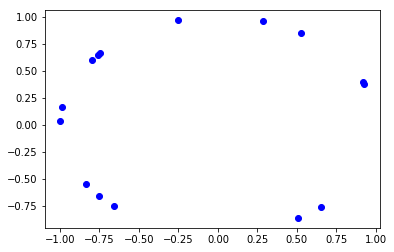

In [26]:
import matplotlib.pyplot as mpp
mpp.plot(x,y,'bo')
